# Question1

In [6]:
from __future__ import division
from sklearn import datasets
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt
import operator
from sklearn import metrics


# Gaussain density function
def GDF(data, sigma_k, mu_k):
    det = np.linalg.det(sigma_k)
    sigma_k_inv = np.linalg.pinv(sigma_k)
    sub = data - mu_k
    constant = 1.0 / ((2 * np.pi) ** (len(data) / 2) * (det ** 0.5))
    x = -0.5 * np.matmul(np.matmul(sub, sigma_k_inv), sub.T)
    term = math.pow(math.e, x)
    # print(term)
    return (constant * term)

# We calculate the sum of probablity for each data point in each class
def Sum_Prob(K, mu, sigma, pi, data):
    pb = 0.0
    for k in range(K):
        pb = pb + (pi[k] * GDF(data, sigma[k], mu[k]))

    return pb

# We calculate the log likelihood
def likelihood(K, mu, sigma, pi, data):
    log_score = 0.0
    for n in range(len(data)):
        
        log_score += np.log(Sum_Prob(K, mu, sigma, pi, data[n]))

    return log_score / data.shape[0]

# Initialize parameters where we randomly initialize our parameters
def InitializeParameters(K, data):
    mat = np.random.rand(data.shape[0], K)
    mat = mat / mat.sum(axis=1, keepdims=True)
    mat = {i: mat[:, i].tolist() for i in range(K)}
    return Maximization(mat, K, data)

# Expectation step where probablity of each data point is calculated w.r.t density function
def Expectation(K, mu_k, sigma_k, pi_k, data):
    mat = {}
    for i in range(len(data)):
        for k in range(K):
            val = pi_k[k] * GDF(data[i], sigma_k[k], mu_k[k]) / Sum_Prob(K, mu_k, sigma_k, pi_k, data[i])
            mat.setdefault(k, []).append(val)

    return mat

# Maximazation STep where mu,sigma and pi values are computed
def Maximization(mat, K, data):
    N_k = [sum(mat[key]) for key in sorted(mat.keys())]
    new_pi_k = np.zeros(K)
    for k in range(K):
        new_pi_k[k] = (N_k[k] / len(data))

    new_muk = []
    for k in range(K):
        z = np.multiply(np.array(mat[k]).reshape([-1, 1]), data)
        val = np.sum(z, axis=0)
        new_muk.append(val / N_k[k])

    newsigma_k = []
    for k in range(K):
        term = np.subtract(data, new_muk[k])
        term = np.array(term)
        terrtra = term.T
        term = np.multiply(np.array(mat[k]).reshape([-1, 1]), term)  # P * (X - mu)
        val = np.matmul(terrtra, term) * np.eye(data.shape[1])  # (X - mu).T * P * (X - mu)
        newsigma_k.append(val * 1 / N_k[k])

    return new_muk, newsigma_k, new_pi_k


def GaussianMixtureModel(K, dataset):
    mu, sigma, pi = InitializeParameters(K, dataset)

    threshold = 0.0001
    log_score = likelihood(K, mu, sigma, pi, data)

    i = 0
    while (i < 100):
        mat = Expectation(K, mu, sigma, pi, data)
        new_mu, new_sigma, new_pi = Maximization(mat, K, data)
        mu, sigma, pi = new_mu, new_sigma, new_pi
        new_log_score = likelihood(K, new_mu, new_sigma, new_pi, data)
        print new_log_score, log_score
        if (new_log_score - log_score) < threshold:
            break
        log_score = new_log_score
        i = i + 1
    return mat


np.random.seed(10)
iris_data = datasets.load_iris()
data = iris_data.data

In [14]:

# evaluation function
def find(mat, data,K):
    Pred_list=[]

    for i in range(len(data.data)):
        Pred_list.append(max(mat, key=lambda k: mat[k][i]))
    print "evaluation value is  ",metrics.adjusted_rand_score(data.target, Pred_list)
# Graph plot function to plot graph
def Graph_PLot(mat,data):
    N = len(data)

    data=np.array(data)
    width = 1
    colors = ['r', 'b', 'g', 'y']
    bottom=[0 for i in range(N)]
    i = 0
    for i in  mat.keys():
        zipped=zip(mat[i],data[:,0])

        zipped.sort(key=lambda t: t[1])
        a, b = [list(c) for c in zip(*zipped)]

        plt.bar(range(len(b)), a, width, bottom, color=colors[i])
        i = i + 1

        bottom = np.array(bottom)+np.array(a)
    plt.xlabel("Sepal Length")
    plt.ylabel("probablity")
    plt.show()







-4.90576159471 -4.93283695601
-4.69709328974 -4.90576159471
-3.85329810958 -4.69709328974
-3.15762876678 -3.85329810958
-2.86535662856 -3.15762876678
-2.52516058074 -2.86535662856
-2.41449262517 -2.52516058074
-2.16993571592 -2.41449262517
-2.07438923756 -2.16993571592
-2.06125885678 -2.07438923756
-2.05525668327 -2.06125885678
-2.05334299954 -2.05525668327
-2.05296507421 -2.05334299954
-2.05290618585 -2.05296507421


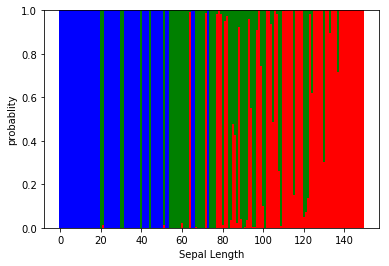

evaluation value is   0.834075047011


In [15]:
mat = GaussianMixtureModel(3, data)
Graph_PLot(mat,data)
find(mat,iris_data,3)

In [16]:
# Graph plot function to plot graph
def Graph_PLot(mat,data):
    N = len(data)

    data=np.array(data)
    width = 1
    colors = ['r', 'b', 'g', 'y']
    bottom=[0 for i in range(N)]
    i = 0
    for i in  mat.keys():
        zipped=zip(mat[i],data[:,1])

        zipped.sort(key=lambda t: t[1])
        a, b = [list(c) for c in zip(*zipped)]

        plt.bar(range(len(b)), a, width, bottom, color=colors[i])
        i = i + 1

        bottom = np.array(bottom)+np.array(a)
    plt.xlabel("Sepal Width")
    plt.ylabel("probablity")
    plt.show()


-4.71386212918 -4.90950298678
-3.8812525629 -4.71386212918
-3.00773780787 -3.8812525629
-2.19221210471 -3.00773780787
-2.07421572434 -2.19221210471
-2.06382621212 -2.07421572434
-2.06096642967 -2.06382621212
-2.05906706444 -2.06096642967
-2.05766441794 -2.05906706444
-2.05660234784 -2.05766441794
-2.05578921846 -2.05660234784
-2.05516296393 -2.05578921846
-2.05467871006 -2.05516296393
-2.05430293164 -2.05467871006
-2.0540102432 -2.05430293164
-2.0537813489 -2.0540102432
-2.0536015749 -2.0537813489
-2.05345975925 -2.0536015749
-2.05334740038 -2.05345975925
-2.05325800625 -2.05334740038


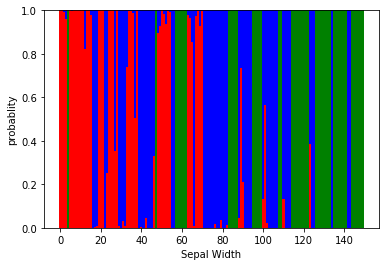

evaluation value is   0.818005634904


In [17]:
mat = GaussianMixtureModel(3, data)
Graph_PLot(mat,data)
find(mat,iris_data,3)

## Graphs of Sepal width and sepal length vs probablities


# Evaluation:

### First I started with 3 classes and  calculated the probablities of each datapoint in each class using EM algorithm. Then going on to next step I assigned each datapoint to particular class in which it's probablity is higher. Then using sklearn metrics.adjusted_rand_score , I compared the predicted and true labels and computed the accuracy. After every graph I have printed the accuracy computed from sklearn method. Then I repeated the same steps taking 2 and 4 set of classes and found that the accuracy was maximum when we have 3 number of classes which makes clear using 3 labels would be better than 2 0r 4. 

### The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
### ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

### I have used  ARI that will measure not only the correct separation of elements belonging to different classes but also the relation between elements of the same clas. We can say that ARI evaluates the capability of the algorithm to separate the elements belonging to different classes. 

# References:
##### sklearn.metrics.adjusted_rand_score¶


#### On the Use of the Adjusted Rand Index as a Metric for Evaluating Supervised Classification
#### Jorge M. Santos1 and Mark Embrechts2
#### 1 ISEP - Instituto Superior de Engenharia do Porto, Portugal
#### 2 Rensselaer Polytechnic Institute, Troy, New York, USA
#### emails:jms@isep.ipp.pt, embrem@rpi.edu

# Question2

### 1. The causal model has been drawn and the word file is attached.

In [5]:
from lea import *

alt_broken=Lea.boolProb(1,1000)
fan_broken=Lea.boolProb(2,100)

battery_not_charging= Lea.buildCPT((alt_broken & ~fan_broken,Lea.boolProb(1000,1000)),
                      (~alt_broken & fan_broken,Lea.boolProb(1000,1000)),
(alt_broken & fan_broken,Lea.boolProb(1000,1000)),
(~alt_broken & ~fan_broken,Lea.boolProb(5,1000)))

battery_flat= Lea.buildCPT((battery_not_charging,Lea.boolProb(900,1000)),
                          (~battery_not_charging, Lea.boolProb(100, 1000)))

car_not_start= Lea.buildCPT((battery_flat,Lea.boolProb(100,100)),
                          (~battery_flat, Lea.boolProb(5, 100)))


print  "probablity that alternator is broken given car not starting  ",Pf(alt_broken.given(car_not_start))
print "probablity that fan is broken given car not starting  ",Pf(fan_broken.given(car_not_start))

print "probablity that fan is broken given car not starting and alternator broken  ",Pf(fan_broken.given(car_not_start & alt_broken))
print "probablity that alternator and fan is broken given car not starting  ",Pf((alt_broken & fan_broken).given(car_not_start))




probablity that alternator is broken given car not starting   0.00549600450796
probablity that fan is broken given car not starting   0.109920090159
probablity that fan is broken given car not starting and alternator broken   0.02
probablity that alternator and fan is broken given car not starting   0.000109920090159


# Question3

loaded
[[243   0   0   0   0   1   0   0   0   0   0   1   0   2   0   5   2   5
   10  50]
 [ 40 194   8   8   3  39   1   0   0   0   1  31   2   0   9   0   4   4
   32  13]
 [ 15  16 141  42   0  32   0   0   0   0   0  44   1   1  11   0   5   1
   70  15]
 [ 15   7  10 250  12   6   2   0   0   0   1  41  14   1   6   0   1   2
   19   5]
 [ 12   7   5  19 231   5   6   2   0   1   0  26   5   1   5   0   6   5
   46   3]
 [ 24   8   2   6   1 304   0   0   0   1   0  31   0   0   4   0   2   3
    9   0]
 [ 24   2   1  29   8   1 215  16   2   0   4   8   9   5   4   0   7   3
   43   9]
 [ 19   1   0   4   0   0   2 279   1   2   2   3   0   2   6   0  16   1
   54   4]
 [ 17   0   0   1   0   0   0   6 306   0   0   2   1   0   1   0  13   2
   46   3]
 [ 37   0   0   0   1   0   0   2   1 260  20   1   0   1   2   0   2   3
   59   8]
 [ 31   0   0   0   0   0   0   0   0   2 342   1   0   0   0   0   2   1
   19   1]
 [ 27   1   1   0   0   0   0   0   0   0   0 345   1   0 

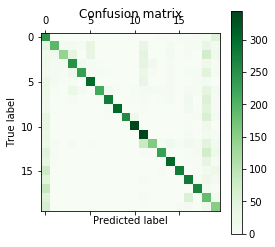

In [7]:
from __future__ import division
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk import re
from nltk.corpus import stopwords
import collections
import string
import numpy as np
from collections import Counter

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test=fetch_20newsgroups(subset="test")
stop_words = set(stopwords.words('english'))

list=zip(newsgroups_train.target,newsgroups_train.data)
class_data={}
for class_, val in list:
    class_data.setdefault(class_, []).append(val)

print "loaded"
def word_list1(document):
    document = re.split('\W+',document.lower())
    words = [w for w in document if not w in stop_words and len(w) > 2]
    return set(words)

def class_prior(class_value):
    freq=len(class_data[class_value])
    return freq*1.0/len(newsgroups_train.target)

prob_table={}
all_words=set()

for class_ in class_data.keys():
    prob_table[class_] = {}
    for document in class_data[class_]:
        words = word_list1(document)
        all_words |= words
        for word in words:
            prob_table[class_][word] = prob_table[class_].get(word,0) + 1

vocab_count = len(all_words)

for class_ in prob_table:
    class_count = len(class_data[class_])
    for word in prob_table[class_]:
        prob_table[class_][word] = (prob_table[class_][word] + 1)/(class_count+2)
    prob_table[class_]["**default**"] = 1.0/(class_count+2)

predicted_list = []
for doc in newsgroups_test.data:
    words = word_list1(doc)
    res = -1
    c = None
    for class_ in prob_table.keys():
        p = class_prior(class_)
        for word in words:
            try:
                p = p * prob_table[class_].get(word,prob_table[class_]["**default**"])
            except KeyError:
                print "err"
                continue

        if(p>res):
            res=p
            c=class_

    predicted_list.append(c)


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(newsgroups_test.target, predicted_list)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm,cmap=plt.cm.Greens)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show() 